<a href="https://colab.research.google.com/github/Chandusiddartha/FML/blob/main/Univariate_analysis_on_compay_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
company = pd.read_csv('Company_data.csv')
company

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
company.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
company.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
company.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

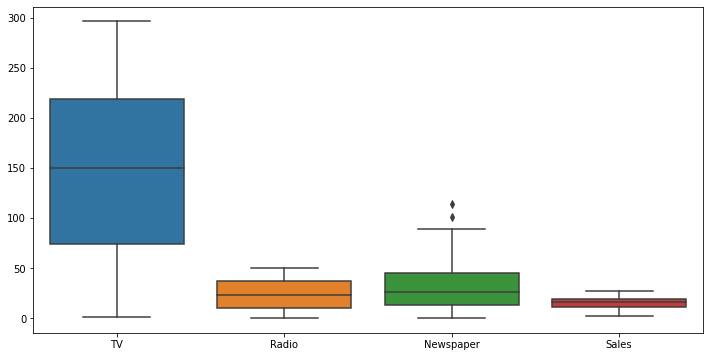

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=company)
plt.show()

In [9]:
q1 = company["Newspaper"].quantile(0.25)
q3 = company["Newspaper"].quantile(0.75)
iqr=q3-q1
print(iqr)

32.35


In [10]:
up=q3+1.5*iqr
down=q1-1.5*iqr

print(up,down)

93.625 -35.775000000000006


In [11]:
outlier=[]
profit=company["Newspaper"]

for i in profit:
    if i>up:
        outlier.append(i)
        print("Up Outlier",i)
        
for i in profit:
    if i<down:
        outlier.append(i)
        print("Down Outlier",i)

Up Outlier 114.0
Up Outlier 100.9


In [12]:
company["Newspaper"]=company["Newspaper"].replace(outlier,company["Newspaper"].median())

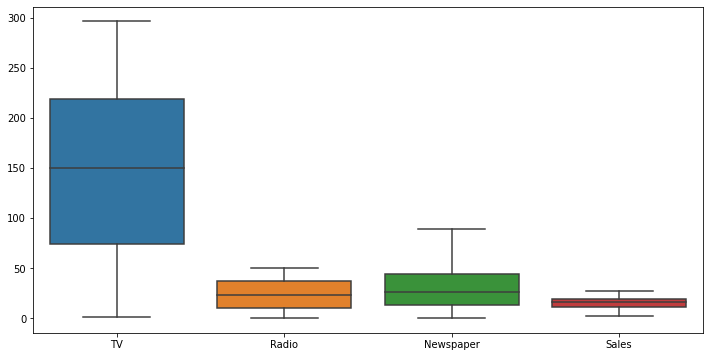

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=company)

In [17]:
corr=company.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.901208
Radio,0.054809,1.000000,0.343141,0.349631
Newspaper,0.048462,0.343141,1.000000,0.149471
Sales,0.901208,0.349631,0.149471,1.000000


<Axes: >

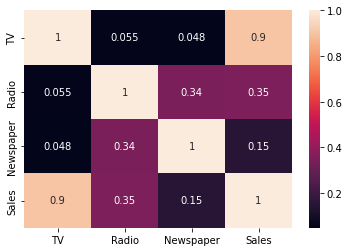

In [19]:
sns.heatmap(corr,annot=True)

As the target is sales. it has high correlation with TV promotions. So consider Tv to predict sales %.

In [20]:
X = company['TV'].values
y = company['Sales'].values
print(X.shape,y.shape)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape, y.shape)

(200,) (200,)
(200, 1) (200, 1)


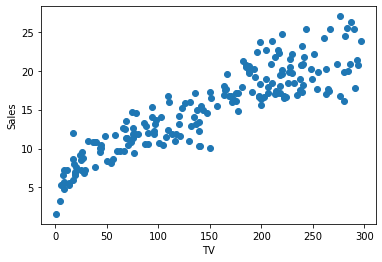

In [21]:
plt.scatter(X,y)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=10)

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.7359015638669721
MSE : 4.715397033072083
RMSE : 2.1714964962145538
R2_SCORE : 0.8079008691813518


In [25]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 2.223502634951674
MSE : 7.287403558117421
RMSE : 2.6995191346084995
R2_SCORE : 0.8176242999443031


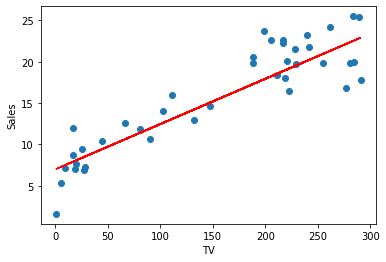

In [28]:
plt.scatter(X_test,y_test)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot(X_test,y_predict_test,color ='red')
plt.show()